In [460]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set(style='whitegrid')
sns.set_context('paper',font_scale=2 )

In [461]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [462]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  
              [500, 700, 750, 600, 1450,        
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) 

In [463]:
def calc_std_feet(x):
    return (x - x.mean()) / x.std()

X_st = X.copy()
X_st[2, :] = calc_std_feet(X[2, :])
X_st[2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

1.*Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip). 

In [464]:
def calc_logloss(y, y_pred):
    return np.mean(- y * np.log(np.clip(y_pred, 1e-7, np.inf) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 1e-7, np.inf))))

In [13]:
y_true = 1
y_pred = 0
calc_logloss(y_true, y_pred)

11.512925464970229

2.Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [465]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [489]:
errors = []
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w
        

In [490]:
w = eval_LR_model(X_st, y, iterations=1000, alpha=231e-3)

100 [-0.74230172 -0.83816982  1.11827081  1.82027932] 0.23080456731116866
200 [-1.43218741 -0.93582867  1.01515986  2.37819891] 0.22111609988204414
300 [-2.04822538 -0.97482428  0.83109536  2.80343982] 0.21348546022039497
400 [-2.60206071 -0.99224882  0.63105353  3.16087975] 0.20699585179493935
500 [-3.10258008 -1.00238663  0.43827025  3.47793906] 0.2014358368876724
600 [-3.55744346 -1.01081275  0.26023343  3.76747865] 0.19665901638362715
700 [-3.97331712 -1.01955004  0.09817452  4.0361776 ] 0.19252464504621808
800 [-4.35592401 -1.02917946 -0.04901499  4.28794333] 0.1889075624321873
900 [-4.71010863 -1.03973151 -0.18314174  4.52536739] 0.185704643193196
1000 [-5.03993389 -1.0510568  -0.30605358  4.75036153] 0.18283441411090015


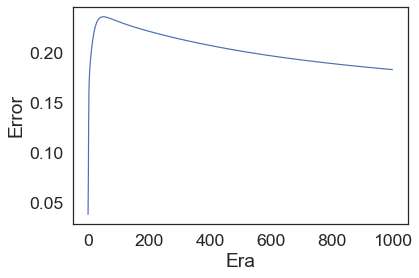

In [468]:
plt.plot(range(len(errors)), errors)
plt.xlabel('Era')
plt.ylabel('Error')
plt.show()


In [469]:
result = pandas.DataFrame(columns=['error', 'alpha'])
n = X.shape[1]

for alpha in np.arange(1e-4, 1e-1, 1e-3):
    w = np.random.randn(X.shape[0])
    err_prev = np.inf
    error = 0
    
    while np.abs(err_prev - error) >= 1e-4:
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err_prev = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        error = calc_logloss(y, (w @ X))
        
        if error > err_prev:
            break
            
    
    result = result.append({'alpha': alpha, 'error': err_prev}, ignore_index=True)
    


<ipython-input-464-960e4472c13d>:2: RuntimeWarning: divide by zero encountered in log
  return np.mean(- y * np.log(np.clip(y_pred, 1e-7, np.inf) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 1e-7, np.inf))))
<ipython-input-464-960e4472c13d>:2: RuntimeWarning: invalid value encountered in multiply
  return np.mean(- y * np.log(np.clip(y_pred, 1e-7, np.inf) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 1e-7, np.inf))))
<ipython-input-464-960e4472c13d>:2: RuntimeWarning: invalid value encountered in log
  return np.mean(- y * np.log(np.clip(y_pred, 1e-7, np.inf) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 1e-7, np.inf))))
<ipython-input-465-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


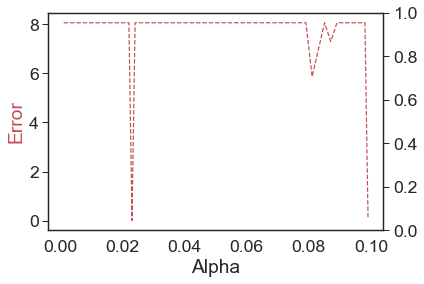

In [470]:
result_fix = result.loc[(result['error'] < 50)]

fig, ax1 = plt.subplots()
ax1.twinx()
ax1.plot(result_fix['alpha'], result_fix['error'], 'r--')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Error', color='r')
plt.show()

In [471]:
result.describe()

,error,alpha
count,47.000000,100.000000
mean,7.655432,0.049600
std,1.654619,0.029011
min,0.008990,0.000100
25%,8.059048,0.024850
50%,8.059048,0.049600
75%,8.059048,0.074350
max,8.059048,0.099100


In [472]:
result.loc[(result['error'] == result['error'].min())]

,error,alpha
23,0.00899,0.0231


In [473]:
result.loc[(result['alpha'] > 0.002) & (result['error'] <= result['error'].quantile(0.05))]

,error,alpha
23,0.008990,0.0231
81,5.865714,0.0811
99,0.096933,0.0991


In [474]:
# минимальное значение alpha 231e-4
print(231e-4)

0.0231


3.Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).

In [475]:
def calc_pred_proba(w, X):
    
    m = X.shape[1]
    
    y_pred_proba = []
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid((w.T @ X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_pred_proba.append(f'Номер объекта: {i},  предсказание класса: {1}')
    
    return y_pred_proba

In [476]:
calc_pred_proba(w, X_st)

['Номер объекта: 0,  предсказание класса: 1',
 'Номер объекта: 1,  предсказание класса: 1',
 'Номер объекта: 2,  предсказание класса: 1',
 'Номер объекта: 3,  предсказание класса: 1',
 'Номер объекта: 5,  предсказание класса: 1',
 'Номер объекта: 8,  предсказание класса: 1']

4.Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).

In [491]:
y_predicted = []

def calc_pred(w, X):
    
    m = X.shape[1]
    
    y_pred = []
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid((w.T @ X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5):
            y_predicted.append(1)
            y_pred.append(f'Предсказание класса: {1}')
        elif (A[:, i] < 0.5):
            y_predicted.append(0)
            y_pred.append(f'Предсказание класса: {0}')
            
    return y_pred

In [492]:
calc_pred(w, X_st)

['Предсказание класса: 0',
 'Предсказание класса: 0',
 'Предсказание класса: 1',
 'Предсказание класса: 0',
 'Предсказание класса: 1',
 'Предсказание класса: 0',
 'Предсказание класса: 1',
 'Предсказание класса: 0',
 'Предсказание класса: 0',
 'Предсказание класса: 1']

5.Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [493]:
print(f'Классификационная оценка точности (accuracy) =  {metrics.accuracy_score(y, y_predicted, normalize=True)}')


Классификационная оценка точности (accuracy) =  0.9


In [494]:
print(f'Точность (precision) = {metrics.precision_score(y, y_predicted)}')

Точность (precision) = 1.0


In [495]:
print(f'Полнота (recall) = {metrics.recall_score(y, y_predicted)}')

Полнота (recall) = 0.8


In [496]:
print(f'Матрица ошибок (confusion_matrix) = \n{metrics.confusion_matrix(y, y_predicted)}')

Матрица ошибок (confusion_matrix) = 
[[5 0]
 [1 4]]


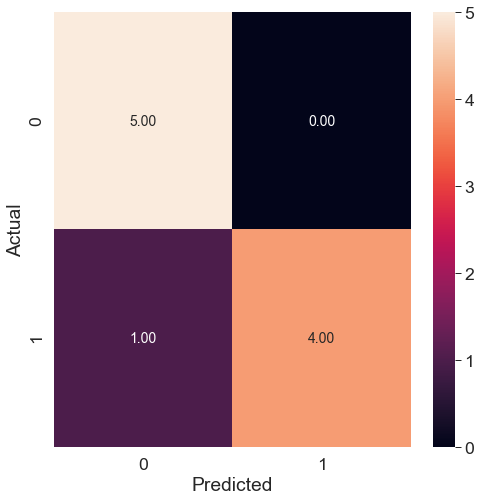

In [497]:
cm = metrics.confusion_matrix(y, y_predicted)

cmn = cm.astype('float')  
cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [498]:
print(f'F1-score = {metrics.f1_score(y, y_predicted)}')

F1-score = 0.888888888888889


6.Могла ли модель переобучиться? Почему?

Важно правильно подобрать скорость обучения(шаг).
Модель могла переобучиться от слишком большого количества итераций, если повышать кол-во итераций с определенным шагом растут и предсказания модели .

7*Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [499]:
def eval_LR_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T) + 2 * lambda_ * w)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [500]:
eval_LR_model_l2(X_st, y, iterations=1000, alpha=231e-3, lambda_=1e-3)

100 [-0.72474744 -0.81673771  1.08694906  1.77555032] 0.23130901329594775
200 [-1.36770205 -0.90060174  0.97815068  2.28343615] 0.22180607917051537
300 [-1.9144373  -0.93106641  0.80788056  2.65333194] 0.21468585765886
400 [-2.38201984 -0.94301758  0.63484822  2.94950284] 0.20895313746367025
500 [-2.78355379 -0.94899096  0.47731231  3.19887915] 0.20428062120468793
600 [-3.12981692 -0.95344607  0.33938359  3.4143256 ] 0.20044671252787394
700 [-3.42972241 -0.95780983  0.22023177  3.60292312] 0.19727364344528348
800 [-3.69060731 -0.96240392  0.1175672   3.76918721] 0.19462157542826244
900 [-3.91849241 -0.96718729  0.02892688  3.91637691] 0.1923831894462264
1000 [-4.11831999 -0.97203157 -0.04790171  4.04704897] 0.19047684438646828


array([-4.11831999, -0.97203157, -0.04790171,  4.04704897])

In [501]:
def eval_LR_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.abs(w))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [502]:
eval_LR_model_l1(X_st, y, iterations=1000, alpha=231e-3, lambda_=1e-3)

100 [-0.74355353 -0.8306173   1.10451956  1.8073011 ] 0.2312746949060922
200 [-1.44078369 -0.92206374  0.99003778  2.35790997] 0.22180236510121273
300 [-2.06750124 -0.95657482  0.79662803  2.78072953] 0.21436087058037573
400 [-2.63429313 -0.97085077  0.58870777  3.13944254] 0.2080664715613806
500 [-3.14941718 -0.97874999  0.38888809  3.46040727] 0.20270401589340717
600 [-3.62014913 -0.98551212  0.20416935  3.75570649] 0.19811916919446976
700 [-4.0529118  -0.99293975  0.03547775  4.03151212] 0.19416579785851446
800 [-4.45365029 -1.00114414 -0.11985461  4.29125883] 0.190646254925356
900 [-4.8283754  -1.0095159  -0.26497768  4.53714705] 0.18746673968514221
1000 [-5.1808979  -1.01841051 -0.40030443  4.77164806] 0.18460263194808607


array([-5.1808979 , -1.01841051, -0.40030443,  4.77164806])